# Tech Stock Analysis

## Questions to Answer

1. Which company stock performed better?
2. Which stock is the most volatile?
3. How related are the tech companies?
4. What is the optimal portfolio allocation?

In [83]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import datetime
import quandl
import seaborn as sns
%matplotlib inline

In [47]:
#Retreive Data
start = datetime.datetime(2013,1,1)
end = datetime.datetime(2017,12,30)

#Companies
google = quandl.get('WIKI/GOOGL',start_date = start, end_date=end, api_key='etr5X48rp9e5_GTXJboB')
amazon = quandl.get('WIKI/AMZN',start_date = start, end_date=end, api_key='etr5X48rp9e5_GTXJboB')
facebook = quandl.get('WIKI/FB',start_date = start, end_date=end, api_key='etr5X48rp9e5_GTXJboB')
intel = quandl.get('WIKI/INTC',start_date = start, end_date=end, api_key='etr5X48rp9e5_GTXJboB')
ibm = quandl.get('WIKI/IBM',start_date = start, end_date=end, api_key='etr5X48rp9e5_GTXJboB')

#Decided to use a Dictionary instead of hardcoding so it can be easily edited.

#Company Dictionary
company_names = {
            'google':'WIKI/GOOGL',
            'amazon':'WIKI/AMZN',
            'facebook':'WIKI/FB',
            'intel':'WIKI/INTC',
            'ibm':'WIKI/IBM'
}

companies = {}

def build_company(dict):
    companies = {}
    for key,value in dict.items():
        companies[key] = quandl.get(value,start_date = start, end_date=end, api_key='etr5X48rp9e5_GTXJboB')
    return companies

company_dict = build_company(company_names)

## Which stock Performed better?

There are various ways to look at performance. Im going to look at a few here:

1. The Open price
2. Total Money traded

Ultimately Im going to look at which stock had the highest return if invested $1.

### Open Price

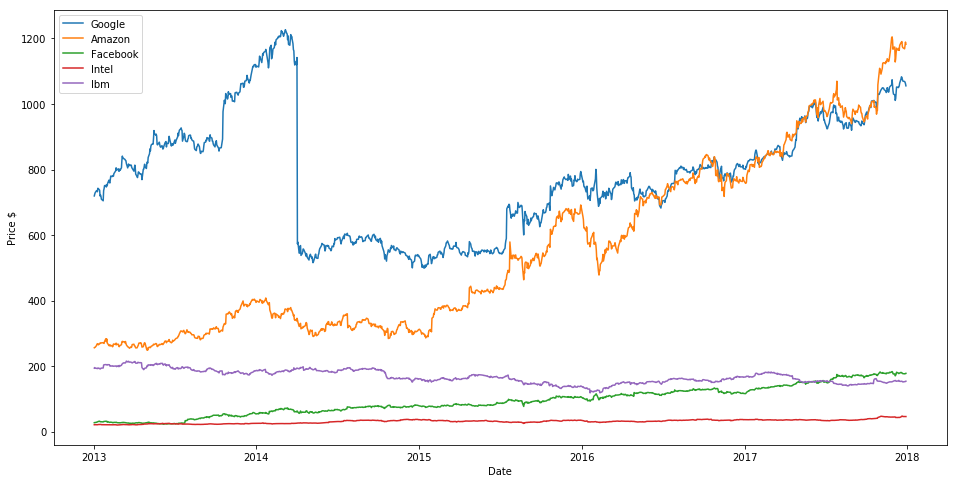

In [61]:
plt.figure(figsize=(16,8))

for key,value in company_dict.items():
        plt.plot(value['Open'], label=key.title())

plt.xlabel('Date')
plt.ylabel('Price $')
plt.legend()
plt.show()
    

Note: The reason for the big Drop in Google price was because of the stock split.

#### Open Price Moving Averages

A good way to look at trends is to use Moving Averages. This helps reduce the noise so we can focus on the trends.

In [49]:
#Create Moving Averages
google['MA100'] = google['Open'].rolling(window=100).mean()
amazon['MA100'] = amazon['Open'].rolling(window=100).mean()
facebook['MA100'] = facebook['Open'].rolling(window=100).mean()
intel['MA100'] = intel['Open'].rolling(window=100).mean()
ibm['MA100'] = ibm['Open'].rolling(window=100).mean()

#Created a function to add the Moving Average instead of hard coding.
def add_ma(dict):
    for key,value in dict.items():
        value['MA100'] = value['Open'].rolling(window=100).mean()
    
#Call the function
add_ma(company_dict)

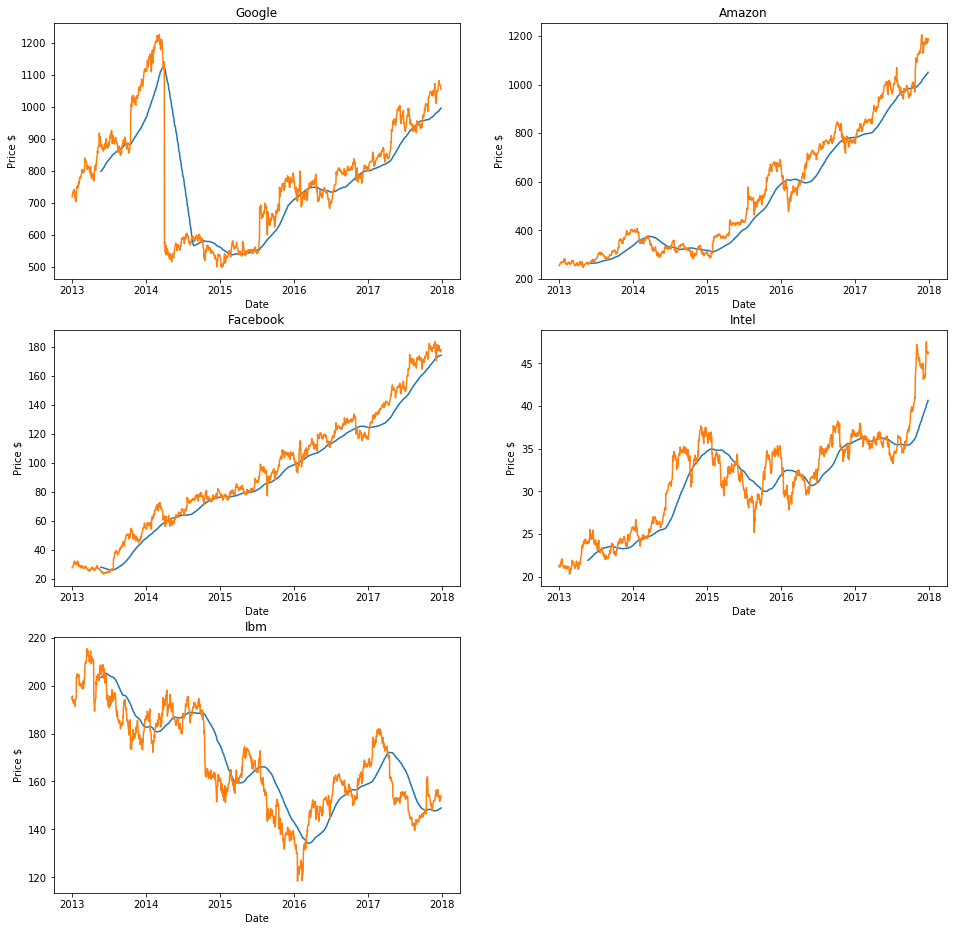

In [57]:
plt.figure(figsize=(16,16))
num_col = 2
num_row = math.ceil(len(company_dict)/2)
count = 0
for key, value in company_dict.items():
    count += 1
    plt.subplot(num_row, num_col, count)
    plt.plot(value[['MA100','Open']])
    plt.ylabel('Price $')
    plt.xlabel('Date')
    plt.title(key.title())

### Total Money Traded

This isnt true market cap, but its an indication of how the stock is performing.

In [58]:
google['Total Traded'] = google['Open']*google['Volume']
amazon['Total Traded'] = amazon['Open']*amazon['Volume']
facebook['Total Traded'] = facebook['Open']*facebook['Volume']
intel['Total Traded'] = intel['Open']*intel['Volume']
ibm['Total Traded'] = ibm['Open']*ibm['Volume']

#Created a function to add Total Traded instead of hard coding.
def add_total_traded(dict):
    for key,value in dict.items():
        value['Total Traded'] = value['Open']*value['Volume']
    
#Call the function
add_total_traded(company_dict)


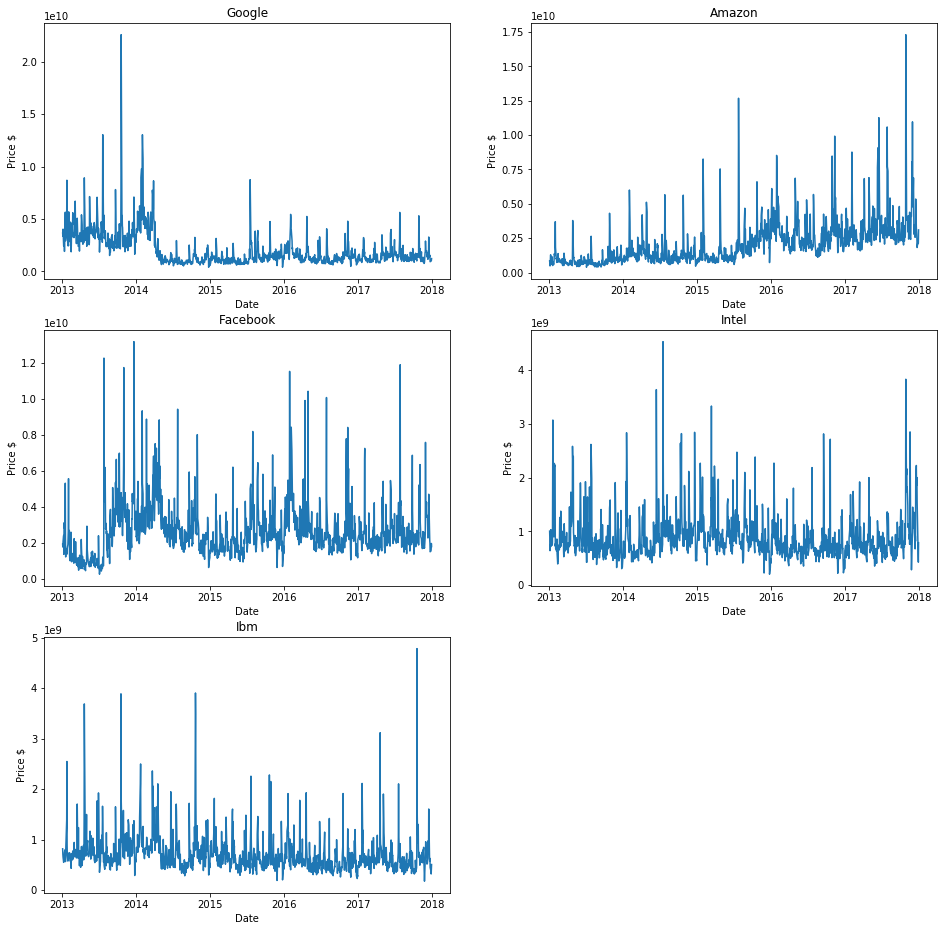

In [59]:
import math
plt.figure(figsize=(16,16))
num_col = 2
num_row = math.ceil(len(company_dict)/2)
count = 0
for key, value in company_dict.items():
    count += 1
    plt.subplot(num_row, num_col, count)
    plt.plot(value['Total Traded'])
    plt.ylabel('Price $')
    plt.xlabel('Date')
    plt.title(key.title())

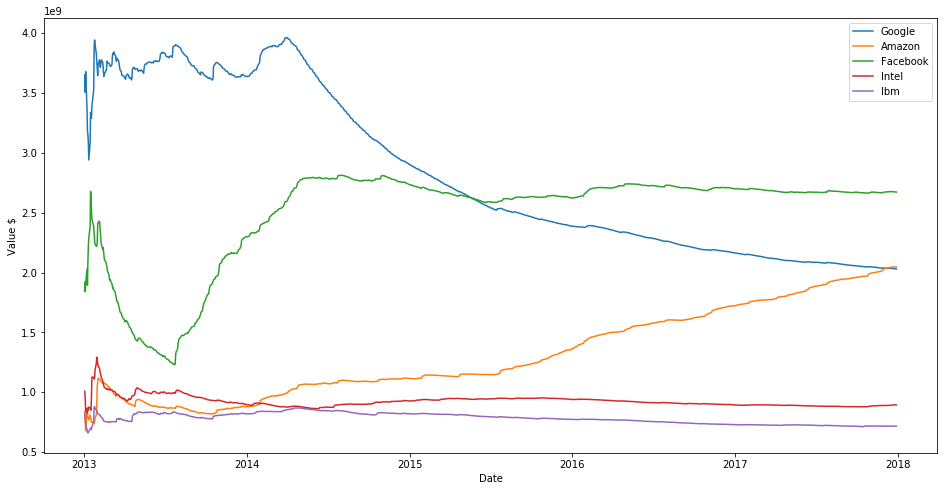

In [60]:
#Rolling value from the start
plt.figure(figsize=(16,8))

for key,value in company_dict.items():
        plt.plot(value['Total Traded'].expanding(min_periods=1).mean(), label=key.title())

plt.xlabel('Date')
plt.ylabel('Value $')
plt.legend()
plt.show()

This shows that Amazon is increasing while Google is decreasing.

Finally, to help answer the question which stock performed better, we have to look at the returns.

In [62]:
#Created a function to add returns instead of hard coding.
def add_returns(dict):
    for key,value in dict.items():
        value['returns'] = value['Close'].pct_change(1)
    
#Call the function
add_returns(company_dict)

Then need to add daily cummulative returns to see if I invested $1 in the beginning of time series, what it will be worth at the end.

In [64]:
#Created a function to add cummulative returns instead of hard coding.
def add_cum_returns(dict):
    for key,value in dict.items():
        value['Cummulative Return'] = (1 + value['returns']).cumprod()
    
#Call the function
add_cum_returns(company_dict)

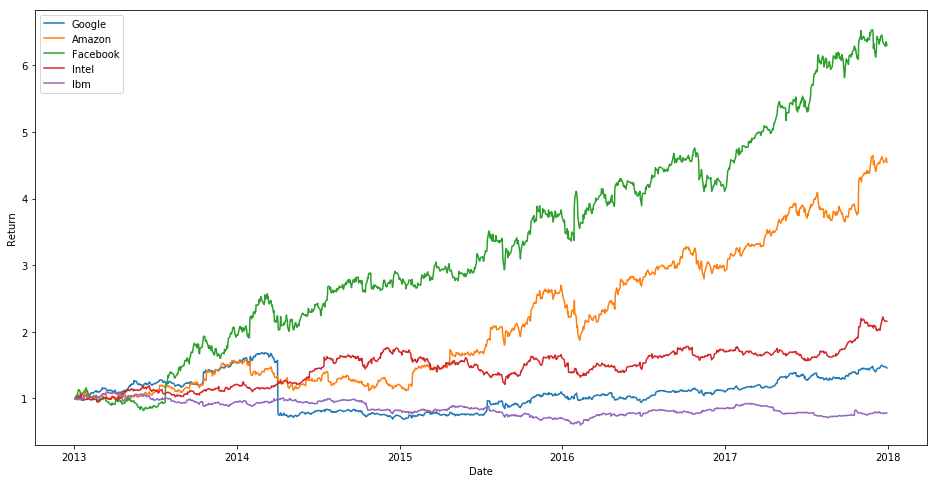

In [66]:
#Cummulative Return
plt.figure(figsize=(16,8))

for key,value in company_dict.items():
        plt.plot(value['Cummulative Return'], label=key.title())

plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.show()

With daily cumulative returns can see if I invested $1 in company of the beginning of the time series, how much would it be worth at the end of the time series. In other words its an aggregate amount an investment has gained or lost over time. If the return is above one, you are making profits else you are in loss.

## Which stock is more volatile?

In order to look at volatility, need to look at a historgram of the returns. Notice the data is normally distributed.

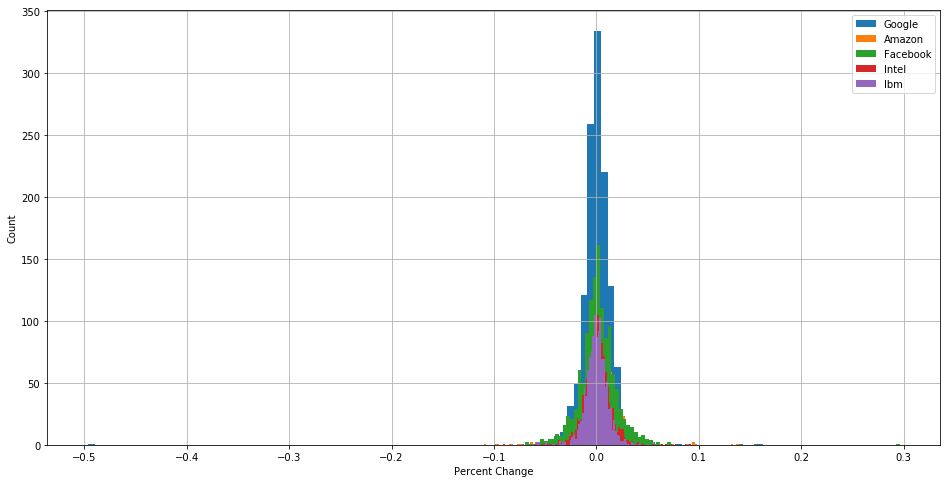

In [77]:
#Volatility
plt.figure(figsize=(16,8))

for key,value in company_dict.items():
    value['returns'].hist(bins=100, label=key.title())

plt.xlabel('Percent Change')
plt.ylabel('Count')
plt.legend()
plt.show()

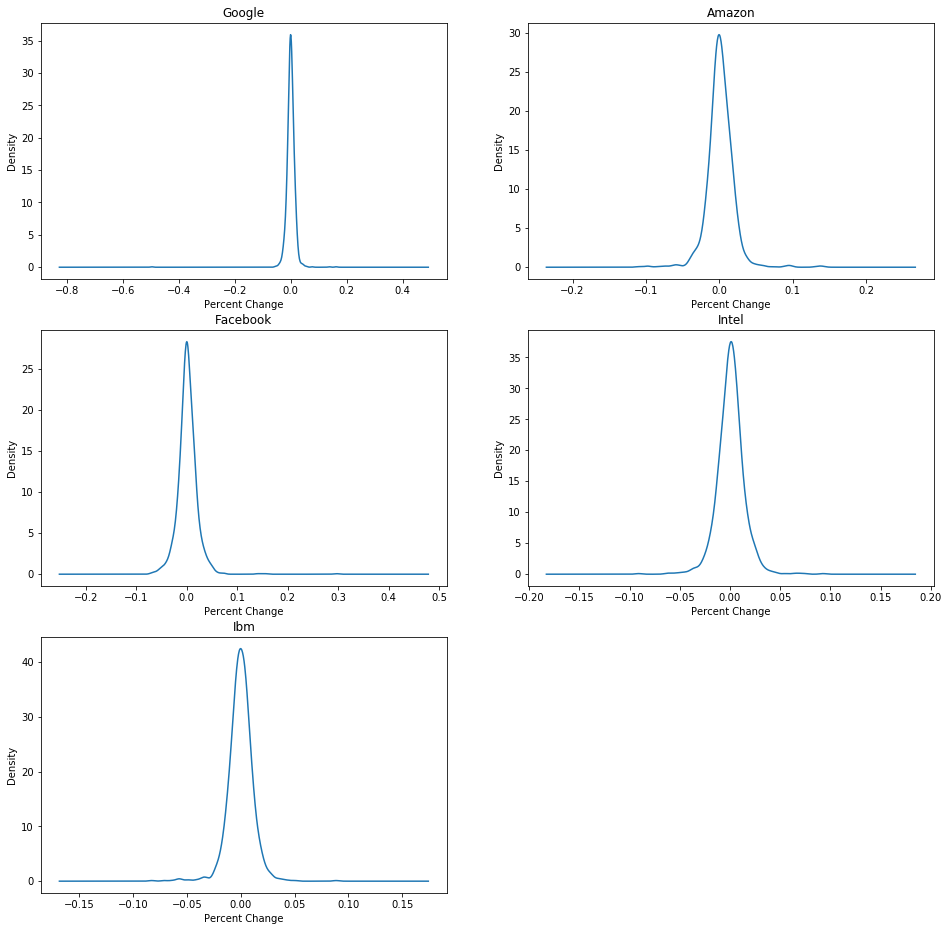

In [78]:
plt.figure(figsize=(16,16))
num_col = 2
num_row = math.ceil(len(company_dict)/2)
count = 0
for key, value in company_dict.items():
    count += 1
    plt.subplot(num_row, num_col, count)
    value['returns'].plot(kind='kde')
    plt.ylabel('Density')
    plt.xlabel('Percent Change')
    plt.title(key.title())

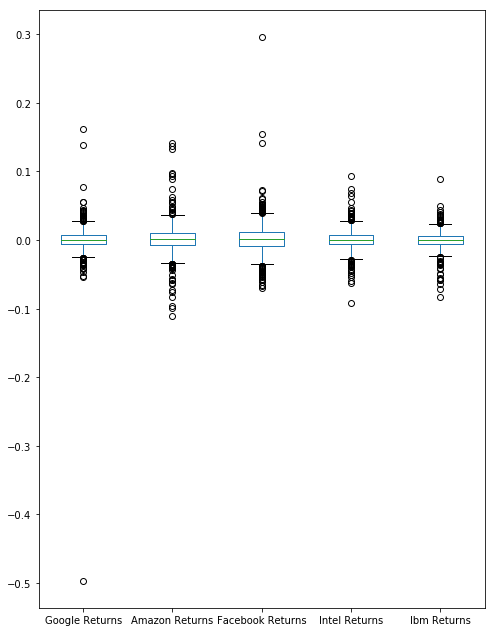

In [79]:
box_list = []
box_columns = []
for key, value in company_dict.items():
    box_list.append(value['returns'])
    box_columns.append(key.title()+' Returns')

box_df = pd.concat(box_list,axis=1)

box_df.columns = box_columns
box_df.plot(kind='box',figsize=(8,11))

This shows the stocks are not that volatile.

## What is the optimal portfolio allocation?

In [82]:
#Create new dataframe to hold the Adjusted close price
stock_list = []
stock_columns = []
for key, value in company_dict.items():
    stock_list.append(value['Adj. Close'])
    stock_columns.append(key.title())


stocks_df = pd.concat(stock_list,axis=1)
stocks_df.columns = stock_columns
stocks_df.head()

,Google,Amazon,Facebook,Intel,Ibm
Date,,,,,
2013-01-02,362.744758,257.3100,28.0000,18.101359,168.890592
2013-01-03,362.955409,258.4800,27.7700,18.050560,167.961630
2013-01-04,370.127548,259.1500,28.7600,17.915096,166.860637
2013-01-07,368.512563,268.4592,29.4213,17.991295,166.129509
2013-01-08,367.785318,266.3800,29.0607,17.855831,165.897268


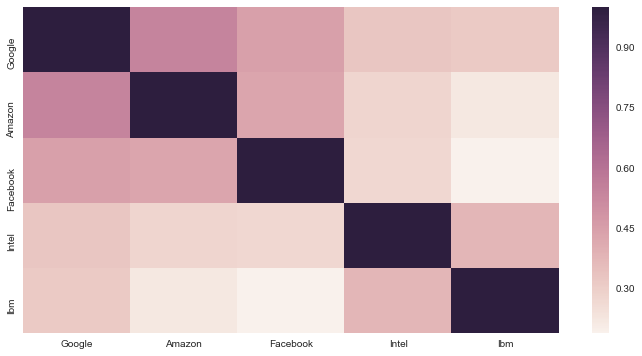

In [85]:
#Lets look to see if any of these stocks are correlated
plt.figure(figsize=(12,6))
sns.heatmap(stocks_df.pct_change(1).corr())

This shows that Amazon and Google are correlated, but Facebook and IBM are not.

In [87]:
#Log returns detrend or normalized the data.
log_ret = np.log(stocks_df/stocks_df.shift(1))
log_ret.head()

,Google,Amazon,Facebook,Intel,Ibm
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,0.000581,0.004537,-0.008248,-0.002810,-0.005516
2013-01-04,0.019568,0.002589,0.035029,-0.007533,-0.006577
2013-01-07,-0.004373,0.035292,0.022733,0.004244,-0.004391
2013-01-08,-0.001975,-0.007775,-0.012332,-0.007558,-0.001399


We are going to use the Sharpe Array to get the best portfolio allocation.

In [91]:
num_portfolio = 10000
num_stocks = len(stocks_df.columns)
all_weights = np.zeros((num_portfolio, num_stocks))
ret_arr = np.zeros(num_portfolio)
vol_arr = np.zeros(num_portfolio)
sharpe_arr = np.zeros(num_portfolio)

np.random.seed(101)

for index in range(num_portfolio):    
    weights = np.array(np.random.random(num_stocks))
    weights = weights/np.sum(weights)

    #Save Weights (using numpy broadcasting)
    all_weights[index,:] = weights
    
    # Expectet Return
    ret_arr[index] = np.sum(log_ret.mean() * weights * 252)

    #Expected volatility
    vol_arr[index] = np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*252,weights)))

    #Sharpe Ratio
    sharpe_arr[index] = ret_arr[index]/vol_arr[index]

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.06 µs


In [93]:
max_sr_ret = ret_arr[sharpe_arr.argmax()]
max_sr_vol = vol_arr[sharpe_arr.argmax()]

In [102]:
allocation_list = all_weights[sharpe_arr.argmax(),:]
allocation = pd.DataFrame(allocation_list.reshape(-1, len(allocation_list)), columns=stock_columns)

allocation

,Google,Amazon,Facebook,Intel,Ibm
0,0.146088,0.232365,0.298981,0.320176,0.00239


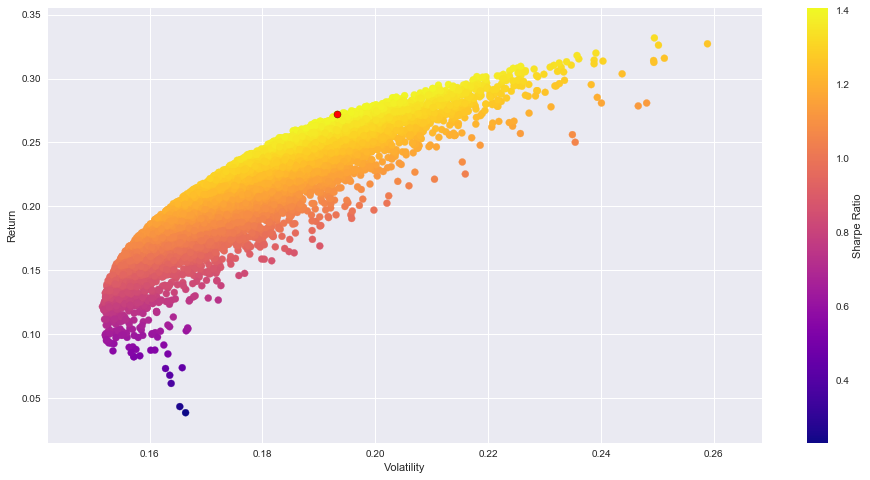

In [94]:
plt.figure(figsize=(16,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

#Add point with the max Sharpe Ratio
plt.scatter(max_sr_vol,max_sr_ret, c='red',s=50, edgecolor='black')

### Now lets back test our portfolio

Now we know the optmial portfolio allocation of our stocks, lets see how it would have performed from the begining of our time series.

In [104]:
#Created a function to add normalized proces, this should be the same as cummulative return
def add_normed(dict):
    for key,value in dict.items():
        value['Normed Return'] = value['Adj. Close']/value.iloc[0]['Adj. Close']
    
#Call the function
add_normed(company_dict)

In [110]:
#Assign allocation
for key,value in company_dict.items():
    value['Allocation'] = value['Normed Return']*allocation[key.title()][0]

0.146088078824
0.232364966609
0.298981230104
0.320176028015
0.00238969644811


,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,MA100,Total Traded,returns,Cummulative Return,Normed Return,Allocation
Date,,,,,,,,,,,,,,,,,,
2013-01-02,719.42,727.0000,716.5500,723.250,5077500.0,0.0,1.0,360.823829,364.625564,359.384385,362.744758,5077500.0,NaN,3.652855e+09,NaN,NaN,1.000000,0.146088
2013-01-03,724.93,731.9300,720.7200,723.670,4631700.0,0.0,1.0,363.587359,367.098197,361.475841,362.955409,4631700.0,NaN,3.357658e+09,0.000581,1.000581,1.000581,0.146173
2013-01-04,729.34,741.4700,727.6801,737.970,5521400.0,0.0,1.0,365.799187,371.882967,364.966667,370.127548,5521400.0,NaN,4.026978e+09,0.019760,1.020353,1.020353,0.149061
2013-01-07,735.45,739.3800,730.5800,734.750,3308000.0,0.0,1.0,368.863647,370.834731,366.421107,368.512563,3308000.0,NaN,2.432869e+09,-0.004363,1.015900,1.015900,0.148411
2013-01-08,735.54,736.2999,724.4300,733.300,3348800.0,0.0,1.0,368.908786,369.289913,363.336585,367.785318,3348800.0,NaN,2.463176e+09,-0.001973,1.013896,1.013896,0.148118
2013-01-09,732.27,738.3500,728.6000,738.118,4045300.0,0.0,1.0,367.268723,370.318137,365.428041,370.201777,4045300.0,NaN,2.962252e+09,0.006570,1.020557,1.020557,0.149091
2013-01-10,742.83,745.0000,733.5000,741.480,3667700.0,0.0,1.0,372.565073,373.653432,367.885628,371.887983,3667700.0,NaN,2.724478e+09,0.004555,1.025206,1.025206,0.149770
2013-01-11,742.00,742.4264,736.3000,739.990,2567800.0,0.0,1.0,372.148788,372.362648,369.289963,371.140676,2567800.0,NaN,1.905308e+09,-0.002009,1.023146,1.023146,0.149469
2013-01-14,737.00,742.2000,722.3500,723.250,5722000.0,0.0,1.0,369.641046,372.249097,362.293365,362.744758,5722000.0,NaN,4.217114e+09,-0.022622,1.000000,1.000000,0.146088


### Investment of $100,000 into this portfolio. Lets see how this does.

In [111]:
#Assign Position values.
investment = 100000
for key,value in company_dict.items():
    value['Position Values'] = value['Allocation']*investment

In [114]:
#Create a new dataframe for the portfolio
portfolio = []
portfolio_columns = []
for key, value in company_dict.items():
    portfolio.append(value['Position Values'])
    portfolio_columns.append(key.title())


portfolio_df = pd.concat(portfolio,axis=1)
portfolio_df.columns = portfolio_columns

#Add Total Position Column
portfolio_df['Total Position'] = portfolio_df.sum(axis=1)
portfolio_df.head()

,Google,Amazon,Facebook,Intel,Ibm,Total Position
Date,,,,,,
2013-01-02,14608.807882,23236.496661,29898.123010,32017.602801,238.969645,100000.000000
2013-01-03,14617.291393,23342.154043,29652.531286,31927.749847,237.655220,99777.381790
2013-01-04,14906.134743,23402.658698,30709.643492,31688.141968,236.097384,100942.676286
2013-01-07,14841.094492,24243.330241,31415.773090,31822.921400,235.062884,102558.182107
2013-01-08,14811.806181,24055.567139,31030.727977,31583.313521,234.734278,101716.149096


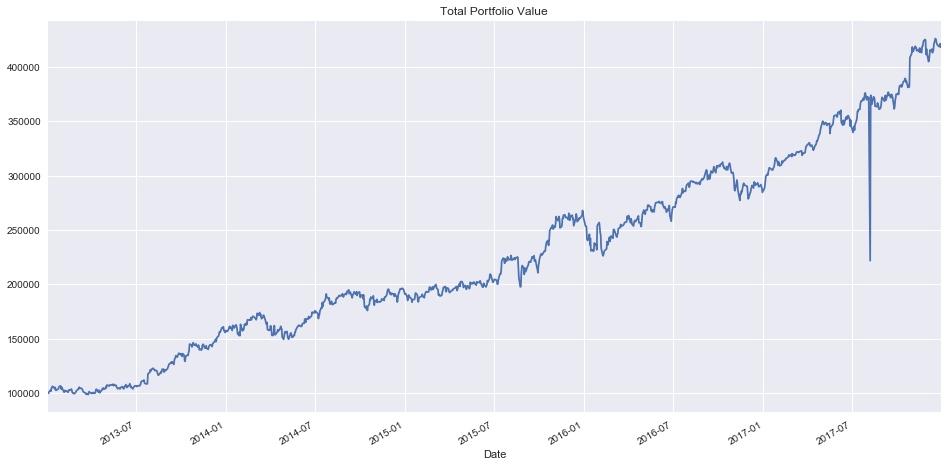

In [116]:
#Plot the Total Position
portfolio_df['Total Position'].plot(figsize=(16,8))
plt.title('Total Portfolio Value')

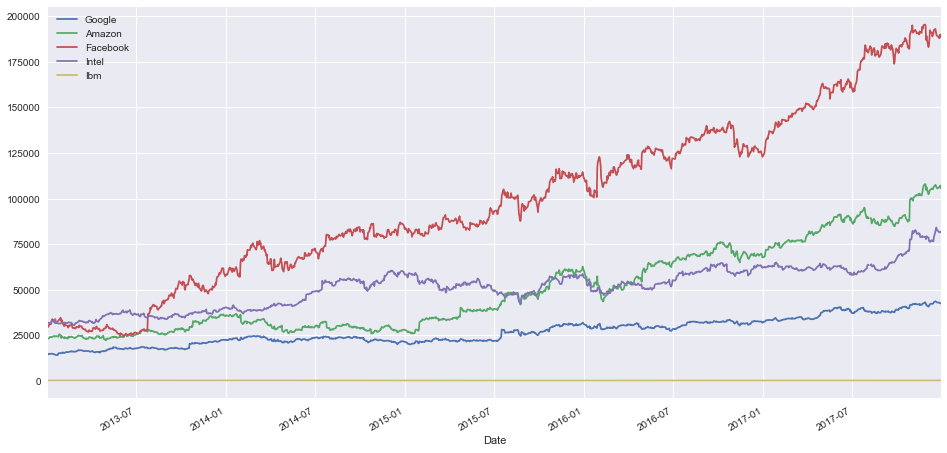

In [120]:
#Look at the potistions individually
portfolio_df.drop('Total Position',axis=1).plot(kind='line', figsize=(16,8))

### Portfolio Statistics

If started with an investment of \$100,000 will end up with \$418,319!

In [122]:
portfolio_df['Daily Return'] = portfolio_df['Total Position'].pct_change(1)
cum_ret = 100 * (portfolio_df['Total Position'][-1]/portfolio_df['Total Position'][0] -1 )
print('Our return {} was percent!'.format(cum_ret))

Our return 318.31998830247034 was percent!


In [125]:
daily = portfolio_df['Daily Return'].mean()
print('Our average daily return mean was {} percent'.format(daily))

Our average daily return mean was 0.0014409925742878645 percent


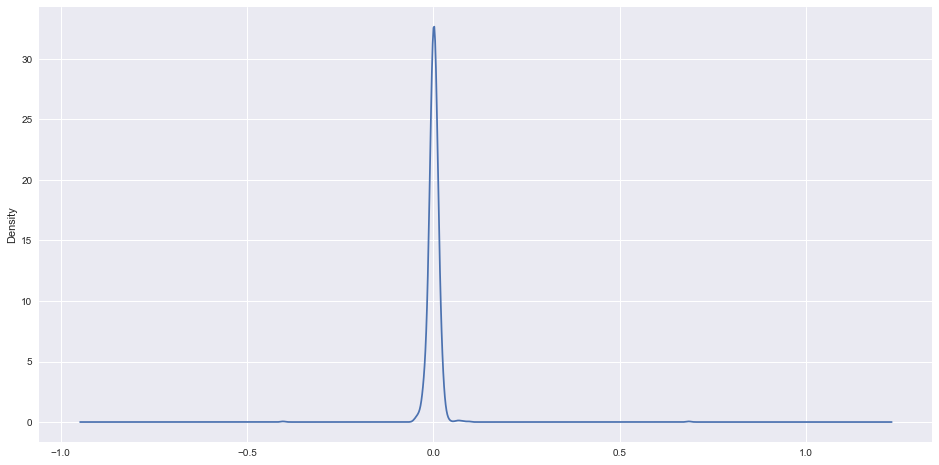

In [127]:
#Standard Deviation
portfolio_df['Daily Return'].plot(kind='kde', figsize=(16,8))